In [1]:
pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.7 MB/s eta 0:00:00


In [2]:
import time
import numpy as np
import pandas as pd
import nltk
import string
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

# Data Visualization
import plotly.express as px

# Classification Model
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Model Training
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import TextVectorization
from keras.utils import pad_sequences
from xgboost import XGBClassifier
from scipy.sparse import hstack

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
fake_df= pd.read_csv("/content/drive/MyDrive/gpt fakearticles/Fake.csv")
real_df = pd.read_csv("/content/drive/MyDrive/gpt fakearticles/True.csv")


In [5]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
# Classification Labels
real_df["Label"] = "Real"
fake_df["Label"] = "Fake"

In [8]:
df = pd.concat([fake_df, real_df])
df.reset_index()
df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [9]:
print(f"Dataset Size: {len(df)}")

Dataset Size: 44898


In [10]:
# Data set management
CLASS_NAMES = ["Fake", "Real"]
MAPPING_DICT = {
    "Fake":0,
    "Real":1
}

# Model Callbacks
model_name = "BERTFakeNewsDetector"
MODEL_CALLBACKS = [ModelCheckpoint(model_name, save_best_only=True)]

In [11]:
data = df.sample(1000).drop(columns=["title", "subject", "date"])
data.Label = data.Label.map(MAPPING_DICT)
data.sample(10)

,text,Label
268,WASHINGTON (Reuters) - The director of the Fed...,1
1814,White House Secretary Sean Spicer decided to r...,0
14312,We love Judge Jeanine s take on everything but...,0
675,Ever since the recusal of Attorney General Jef...,0
529,Donald Trump is truly pathetic.Trump has repor...,0
3547,President Barack Obama knows that President-el...,0
10899,NEW YORK (Reuters) - Hillary Clinton’s campaig...,1
20229,ANKARA (Reuters) - Turkish authorities issued ...,1
3166,(Reuters) - U.S. Homeland Security Secretary J...,1
11741,MOSCOW (Reuters) - Russia may decide to design...,1


# Data Visualization

In [12]:
class_dis = px.histogram(
    data_frame = df,
    y = "Label",
    color = "Label",
    title = "Fake & Real Samples Distribution",
    text_auto=True
    )
class_dis.update_layout(showlegend=False)
class_dis.show()

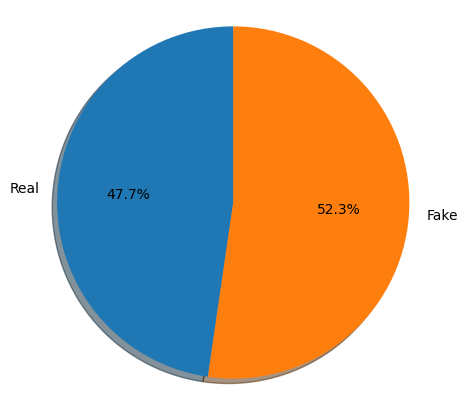

In [13]:
fig = plt.figure(figsize=(5, 5))
labels = 'Real', 'Fake'
sizes = [len(real_df), len(fake_df)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')

plt.show()


In [14]:
subject_dis = px.histogram(
    data_frame = df,
    x = "subject",
    color = "subject",
    facet_col = "Label",
    title = "Fake & Real Subject Distribution",
    text_auto=True
    )
subject_dis.update_layout(showlegend=False)
subject_dis.show()

In [15]:
list(filter(lambda x: len(x)>20, df.date.unique()))

['https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/',
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/',
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg',
 'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]']

In [16]:
df = df[df.date.map(lambda x: len(x)) <= 20]
df.date = pd.to_datetime(df.date)
df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Fake


In [17]:
label_date_hist = px.histogram(
    data_frame = df,
    x = 'date',
    color = "Label",
)
label_date_hist.show()

In [18]:
real_sub_hist = px.histogram(
    data_frame = df[df.Label == "Real"],
    x = 'date',
    color = "subject",
)
real_sub_hist.show()

In [19]:
subject_hist = px.histogram(
    data_frame = df,
    x = 'date',
    color = "subject",
)
subject_hist.show()

# Text Preprocessing

In [20]:
stop_words = set(stopwords.words('english'))
def text_processing(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    clean_text = ' '.join(filtered_words)
    clean_text = clean_text.translate(str.maketrans('', '', string.punctuation)).strip()
    return clean_text

In [21]:
X = data.text.apply(text_processing).to_numpy()
Y = data.Label.to_numpy().astype('float32').reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    train_size=0.9,
    test_size=0.1,
    stratify=Y,
    random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train,
    train_size=0.9,
    test_size=0.1,
    stratify=y_train,
    random_state=42
)

# Bert Model

In [22]:
bert_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(
    bert_name,
    padding = "max_length",
    do_lower_case = True,
    add_special_tokens = True,
)

In [23]:
X_train_encoded = tokenizer(
    X_train.tolist(),
    padding = True,
    truncation = True,
    return_tensors = "tf"
).input_ids

X_valid_encoded = tokenizer(
    X_valid.tolist(),
    padding = True,
    truncation = True,
    return_tensors = "tf"
).input_ids

X_test_encoded = tokenizer(
    X_test.tolist(),
    padding = True,
    truncation = True,
    return_tensors = "tf"
).input_ids

In [24]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_encoded, y_train)).shuffle(len(X_train)).batch(8).prefetch(tf.data.AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid_encoded, y_valid)).shuffle(len(X_valid)).batch(8).prefetch(tf.data.AUTOTUNE)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_encoded, y_test)).shuffle(len(X_test)).batch(8).prefetch(tf.data.AUTOTUNE)

In [25]:
bert_model = TFAutoModelForSequenceClassification.from_pretrained(bert_name, num_labels = 1)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
bert_model.compile(
    optimizer = Adam(learning_rate = 1e-5),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name="Accuracy"),
        tf.keras.metrics.Precision(name="Precision"),
        tf.keras.metrics.Recall(name="Recall"),
    ]
)

model_history = bert_model.fit(
    train_ds,
    validation_data = valid_ds,
    epochs = 20,
    batch_size = 16,
    callbacks = MODEL_CALLBACKS
)

model_history = pd.DataFrame(model_history.history)

Epoch 1/20
102/102 [==============================] - 208s 1s/step - loss: 0.2039 - Accuracy: 0.6642 - Precision: 0.6638 - Recall: 0.6057 - val_loss: 0.0278 - val_Accuracy: 0.9889 - val_Precision: 0.9773 - val_Recall: 1.0000
Epoch 2/20
102/102 [==============================] - 158s 2s/step - loss: 0.0305 - Accuracy: 0.9840 - Precision: 0.9947 - Recall: 0.9716 - val_loss: 0.0123 - val_Accuracy: 0.9889 - val_Precision: 0.9773 - val_Recall: 1.0000
Epoch 3/20
102/102 [==============================] - 150s 1s/step - loss: 0.0132 - Accuracy: 0.9975 - Precision: 1.0000 - Recall: 0.9948 - val_loss: 0.0073 - val_Accuracy: 1.0000 - val_Precision: 1.0000 - val_Recall: 1.0000
Epoch 4/20
102/102 [==============================] - 151s 1s/step - loss: 0.0076 - Accuracy: 1.0000 - Precision: 1.0000 - Recall: 1.0000 - val_loss: 0.0024 - val_Accuracy: 1.0000 - val_Precision: 1.0000 - val_Recall: 1.0000
Epoch 5/20
102/102 [==============================] - 147s 1s/step - loss: 0.0053 - Accuracy: 1.0000

In [27]:
# Save the mdoel
bert_model.save(model_name)

# Plotting Curve

In [28]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("Loss", "Accuracy", "Precision", "Recall"))

# Add traces to subplots
fig.add_trace(go.Scatter(y=model_history['loss'], mode='lines', name='Training Loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=model_history['val_loss'], mode='lines', name='Validation Loss'), row=1, col=1)

fig.add_trace(go.Scatter(y=model_history['Accuracy'], mode='lines', name='Training Accuracy'), row=1, col=2)
fig.add_trace(go.Scatter(y=model_history['val_Accuracy'], mode='lines', name='Validation Accuracy'), row=1, col=2)

fig.add_trace(go.Scatter(y=model_history['Precision'], mode='lines', name='Training Precision'), row=2, col=1)
fig.add_trace(go.Scatter(y=model_history['val_Precision'], mode='lines', name='Validation Precision'), row=2, col=1)

fig.add_trace(go.Scatter(y=model_history['Recall'], mode='lines', name='Training Recall'), row=2, col=2)
fig.add_trace(go.Scatter(y=model_history['val_Recall'], mode='lines', name='Validation Recall'), row=2, col=2)

# Customize the layout
fig.update_layout(
    title='Model Training History',
    xaxis_title='Epoch',
    yaxis_title='Metric Value',
    showlegend=False,
)

# Update subplot axes labels
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_xaxes(title_text='Epoch', row=2, col=1)
fig.update_xaxes(title_text='Epoch', row=2, col=2)

fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)
fig.update_yaxes(title_text='Precision', row=2, col=1)
fig.update_yaxes(title_text='Recall', row=2, col=2)

# Display the figure
fig.show()

# Test Performance Evaluation

In [29]:
test_loss, test_acc, test_precision, test_recall = bert_model.evaluate(test_ds, verbose = 0)

print(f"Test Loss      : {test_loss}")
print(f"Test Accuracy  : {test_acc}")
print(f"Test Precision : {test_precision}")
print(f"Test Recall    : {test_recall}")

Test Loss      : 0.0005119301495142281
Test Accuracy  : 1.0
Test Precision : 1.0
Test Recall    : 1.0


# Model's Prediction Samples

In [30]:
def predict_text(text, model):
    tokens = tokenizer(text, return_tensors = 'tf', padding="max_length", truncation=True).input_ids
    return np.abs(np.round(model.predict(tokens, verbose = 0).logits))

In [31]:
for _ in range(5):
    index = np.random.randint(len(X_test))

    text = X_test[index]
    true = y_test[index]
    model_pred = predict_text(text, model = bert_model)[0]

    print(f"ORGINAL TEXT:\n\n{text}\n\nTRUE: {CLASS_NAMES[int(true)]}\tPREDICTED: {CLASS_NAMES[int(model_pred)]}\n{'-'*100}\n")

ORGINAL TEXT:

right eighth grade trump father sent literally river new york military academy hudson valley trump would spend next five years thereretired col ted dobias remembers tall lanky kid showed dormitory put him end hall know make bed know shine shoes problem know cadet know cadet gotta take care yourself dobias saidand trump cadet quite know how first dobias reputation one school toughest instructors hardened world war ii veteran made clear trump care daddy was got line got treatment like everybody else name donald trump like johnny jones same dobias said nobody different treated everyone alike back trump day cadets would wake near crack dawn hurry uniforms march formation breakfast firstyear cadets eat meals squaredoff lifting forks right angle path mouths breakfast scurry back clean rooms inspection dobias said place kids like following rules learned like it hell thing kid go military school especially say yes sir sir learn salute aboutface march carry gun said dobiasbut ins